In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics



%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
#    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

#heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

heart_df = pd.read_csv('heart.csv')
#engine.dispose()

heart_df.info()
heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

In [3]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

In [4]:
#PCA to reduce dimensionality when plotting
#x_pca = PCA(n_components=3).fit_transform(x_std)

### Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?

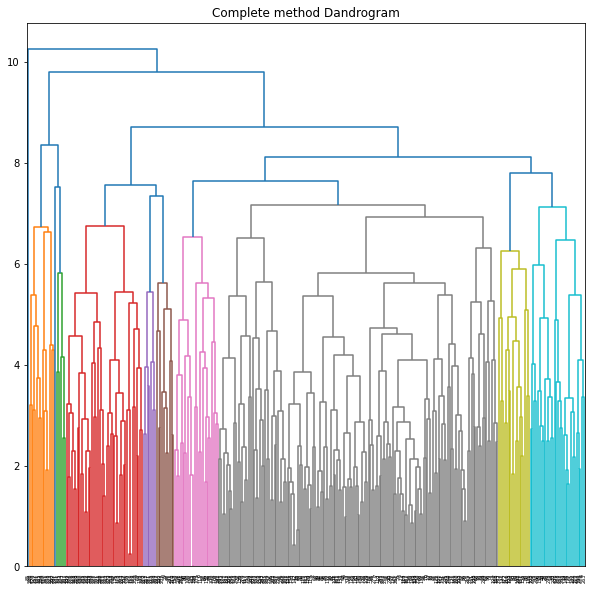

In [5]:
plt.figure(figsize=(10,10))
dendrogram(linkage(x_std, method='complete'))
plt.title('Complete method Dandrogram')
plt.show()

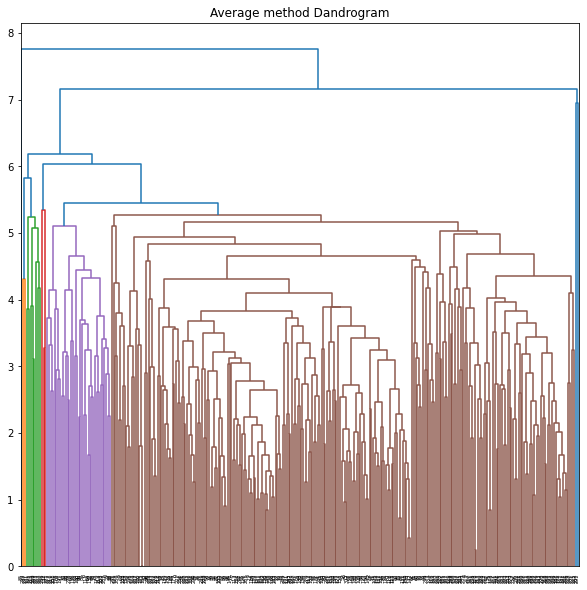

In [6]:
plt.figure(figsize=(10,10))
dendrogram(linkage(x_std, method='average'))
plt.title('Average method Dandrogram')
plt.show()

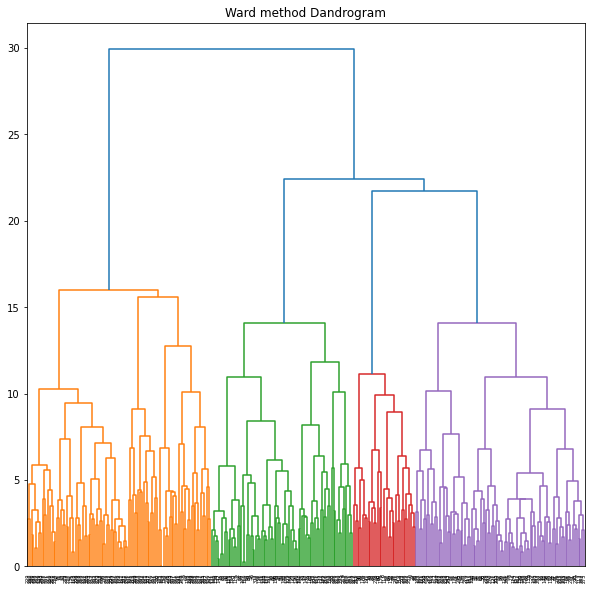

In [7]:
plt.figure(figsize=(10,10))
dendrogram(linkage(x_std, method='ward'))
plt.title('Ward method Dandrogram')
plt.show()

### Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?

Complete Method

In [17]:
agg_cluster_comp = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='cosine')
clusters_com = agg_cluster_comp.fit_predict(x_std)

In [18]:
print("ARI score is: {}".format(metrics.adjusted_rand_score(y, clusters_com)))
print("Silhouette score is: {}".format(metrics.silhouette_score(x_std, clusters_com)))


ARI score is: 0.2457417084730023
Silhouette score is: 0.13559986726838452


Average Method

In [10]:
agg_cluster_avg = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='cosine')
clusters_avg = agg_cluster_avg.fit_predict(x_std)

In [11]:
print("ARI score is: {}".format(metrics.adjusted_rand_score(y, clusters_avg)))
print("Silhouette score is: {}".format(metrics.silhouette_score(x_std, clusters_avg)))


ARI score is: 0.20782425775288046
Silhouette score is: 0.12699181840348694


Ward Method

In [15]:
agg_cluster_ward = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
clusters_ward = agg_cluster_ward.fit_predict(x_std)

In [16]:
print("ARI score is: {}".format(metrics.adjusted_rand_score(y, clusters_ward)))
print("Silhouette score is: {}".format(metrics.silhouette_score(x_std, clusters_ward)))

ARI score is: 0.2454680392170414
Silhouette score is: 0.1325316617259095


The Complete method performed its best with the highest scores